<a href="https://colab.research.google.com/github/AshishhAmin/Vegetable_Classification/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
# Define paths
base_dir = '/content/drive/MyDrive/vegetable_dataset'


# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 3000 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Adjust output layer to match the number of classes
])
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    epochs=20,  # Adjust epochs as needed
    validation_data=val_generator
)


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.9863 - loss: 0.0495 - val_accuracy: 0.9983 - val_loss: 0.0065
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.9854 - loss: 0.0407 - val_accuracy: 0.9950 - val_loss: 0.0958
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.9831 - loss: 0.0808 - val_accuracy: 0.9900 - val_loss: 0.0217
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.9894 - loss: 0.0306 - val_accuracy: 0.9967 - val_loss: 0.0171
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.9896 - loss: 0.0252 - val_accuracy: 0.9967 - val_loss: 0.0107
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.9965 - loss: 0.0129 - val_accuracy: 0.9983 - val_loss: 0.0025
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.9971 - loss: 0.0072 - val_accuracy: 0.9983 - val_loss: 0.0041
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9912 - loss: 0.0323 - val_accuracy: 0.9983 - v

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


19/19 ━━━━━━━━━━━━━━━━━━━━ 114s 6s/step - accuracy: 0.9929 - loss: 0.0664
Test Accuracy: 99.33%


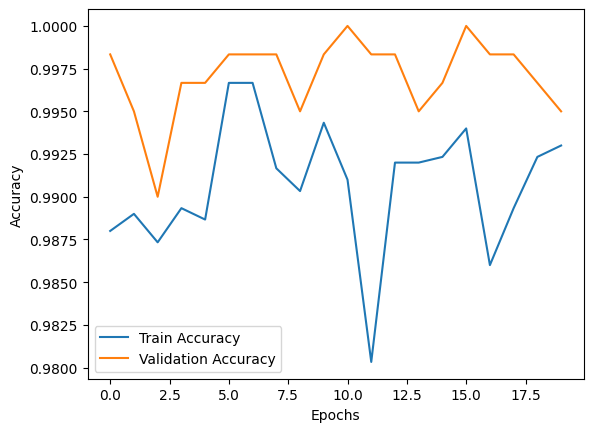

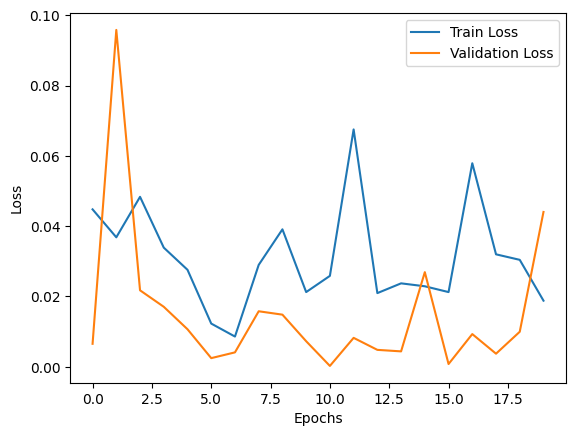

In [ ]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/vegetable_classifier_model.h5')
